In [231]:
import argparse
from datetime import datetime
# from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import pickle

matplotlib.rcParams.update({"figure.facecolor": "white",'text.usetex':'True','font.family': 'DejaVu Sans','font.weight':'bold','font.stretch':'condensed'})

## Color Selection

(0.0, 3.0, 0.0, 10.0)

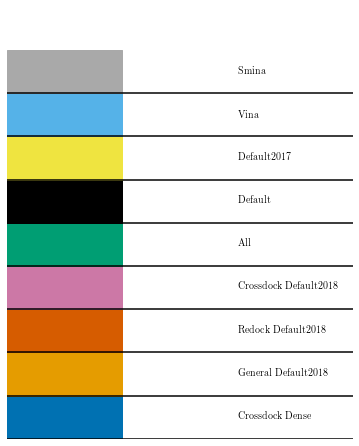

In [232]:
import matplotlib.patches as mpatch
color_dict = {'Crossdock Dense':'#0071b2','General Default2018':'#e59c00',
              'Redock Default2018':'#d65c00','Crossdock Default2018': '#cc78a6',
               'All':'#009e73','Default':'#000000',
               'Default2017':'#efe440','Vina':'#55b2e8','Smina':'#A9A9A9'
              }
fig = plt.figure(figsize=[4.8, 6])
ax = fig.add_axes([0, 0, 1, 1])
for j, (name, c) in enumerate(color_dict.items()):
    weight = None

    r1 = mpatch.Rectangle((0, j), 1, 1, color=c)
    txt = ax.text(2, j+.5, '  ' + name, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.axhline(j, color='k')

ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')

### Prettify Stuff
Most of this is for bar graphs, if we are doing them  
xlim is the only thing used for the line graphs

In [233]:
use_pose=[1,3]
annotate_size=4
width=1
xlim=(1,9)

In [234]:
def makeClNames(badname):
    if 'Dense' in badname:
        name = badname.lower().replace("crossdock ","").replace(" ","\\_")
        name=f'\\texttt{{{name}}}'
    elif 'Default201' in badname:
        name = badname.lower().replace(" ","\\_")
        name=f'\\texttt{{{name}}}'
    else:
        name = badname
    return name

#### Get y-limit of the two graphs

In [235]:
def get_ylim(all_data):
    ylim=[100,0]
    for data in all_data:
        minimum_data = data.min().min()
        maximum_data = data.max().max()
        if minimum_data < ylim[0]:
            ylim[0] = minimum_data
        if maximum_data > ylim[1]:
            ylim[1] = maximum_data
    ylim[0] = np.floor(ylim[0])
    ylim[1] = np.ceil(ylim[1])
    return ylim

## For non sweep figures

In [236]:
def get_linestyle(column_name):
    if 'Ensemble' in column_name:
        linestyle = '-'
    elif 'Vina' == column_name:
        linestyle = (0, (3, 1, 1, 1))
    else:
        linestyle = '--'
    return linestyle

In [237]:
def get_linewidth(column_name):
    if 'Vina' == column_name:
        linewidth = 5
    elif 'Refine' in column_name:
        linewidth = 5
    else:
        linewidth = 2
    return linewidth

In [238]:
xlab='N'
ylab ='TopN(\\%)'
xlim=(1,9)
fontsize=20
dpi=300

### Compare Rescore to Refine

In [239]:
filename='rescore_vs_refine.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_vs_refine_line


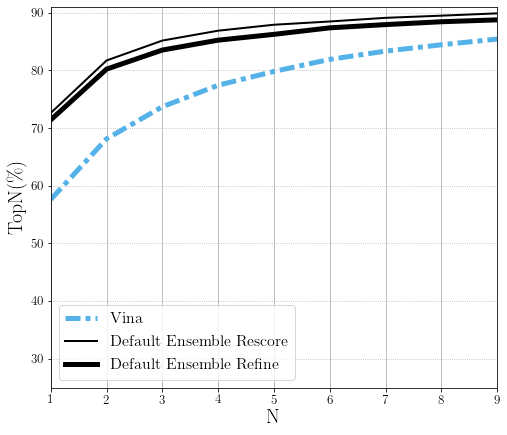

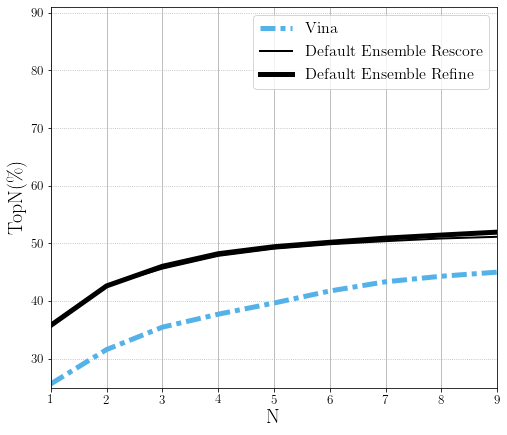

In [240]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','').replace(' Rescore','').replace(' Refine','')]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [241]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### First single models

In [242]:
filename='rescore_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_single_models_line


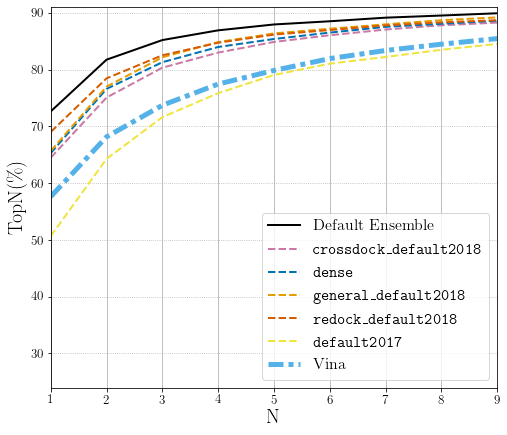

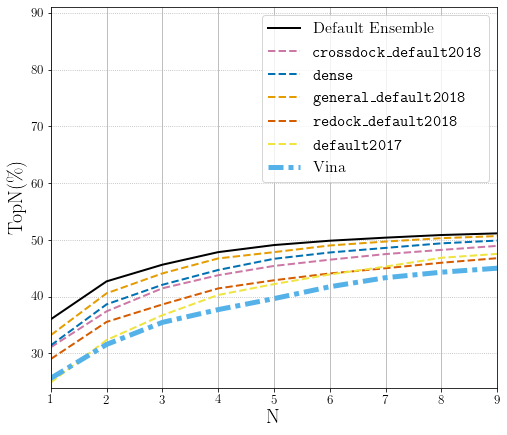

In [243]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')] 
        name = makeClNames(col)
        p = plt.plot(rang, big_df[col], label=name,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [244]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Ensemble models

In [245]:
filename='rescore_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

rescore_ensembles_line


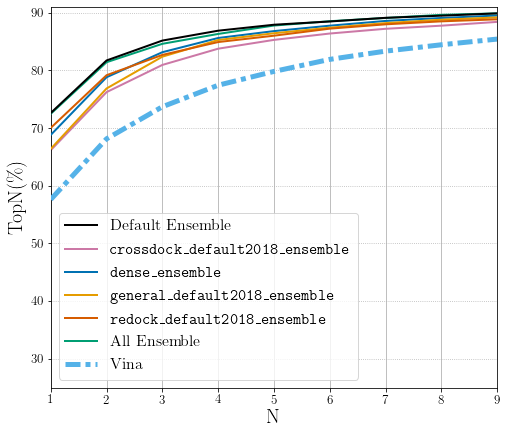

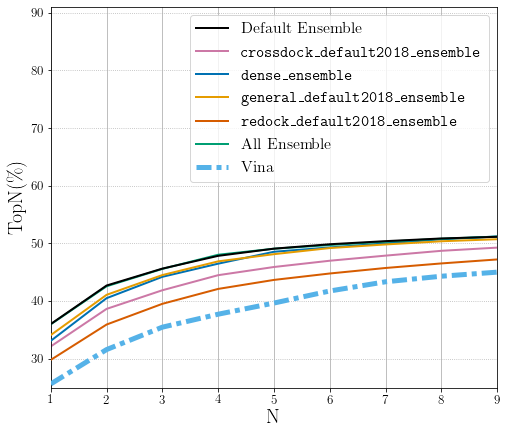

In [246]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        name = makeClNames(col)
        p = plt.plot(rang, big_df[col], label=name,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [247]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Single Models - No PDBbind2017 General and No CD2020

In [248]:
filename='single_models_no2017_nocd2020.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

single_models_no2017_nocd2020_line


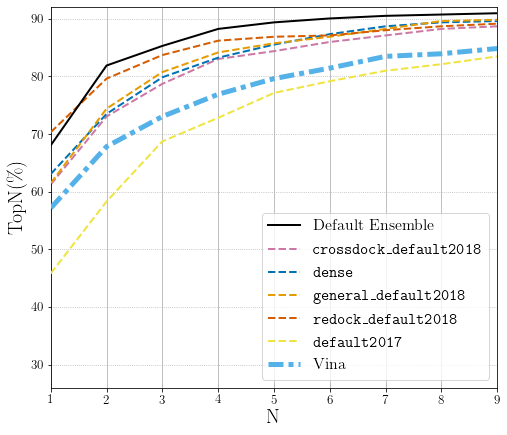

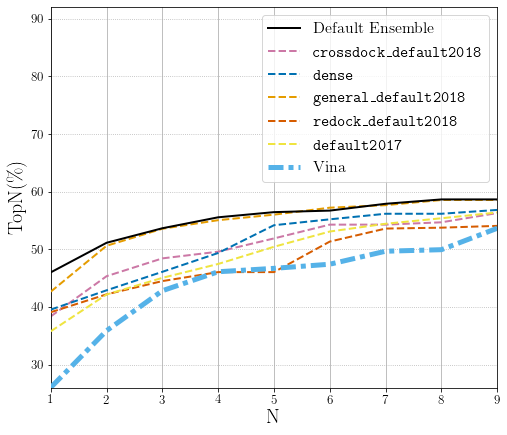

In [249]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        name = makeClNames(col)
        p = plt.plot(rang, big_df[col], label=name,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [250]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Time Split Ensemble Models - No PDBbind2017 General and No CD2020

In [251]:
filename='ensemble_models_no2017_nocd2020.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

ensemble_models_no2017_nocd2020_line


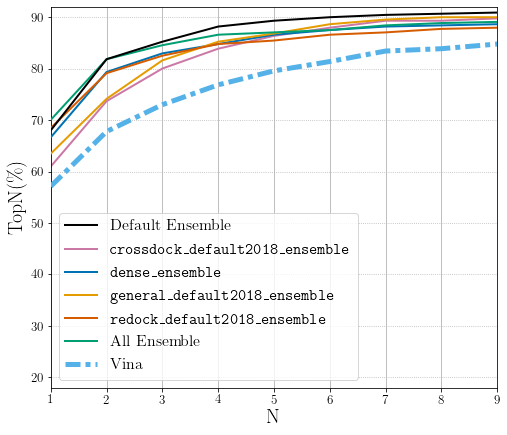

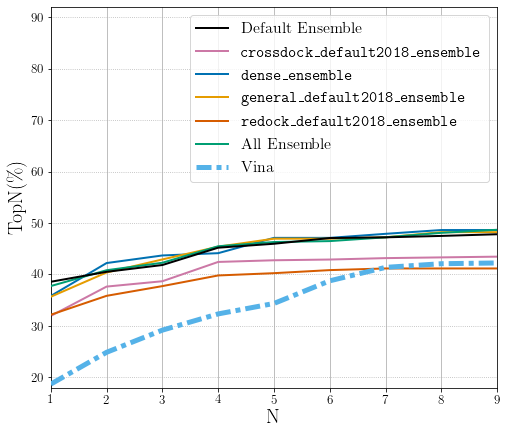

In [252]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        name = makeClNames(col)
        p = plt.plot(rang, big_df[col], label=name,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [253]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

### Refinement Results - Single Models

In [254]:
filename='refine_single_models.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
#plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd])

refine_single_models_line


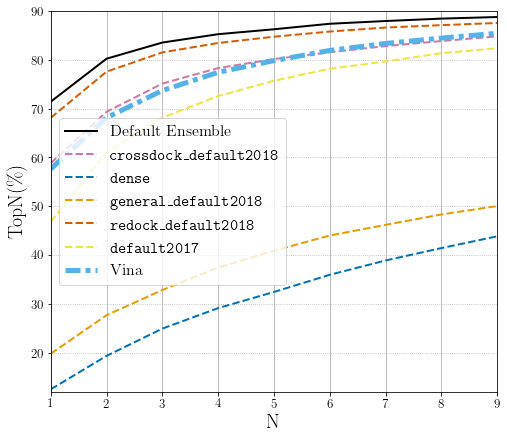

In [255]:
for big_df,data_type in [(plot_df_rd,'redocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        name = makeClNames(col)
        p = plt.plot(rang, big_df[col], label=name,c=c,linestyle=ls,linewidth=lw)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [256]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')

### Refinement Results - Ensemble Models

In [257]:
filename='refine_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd])

refine_ensembles_line


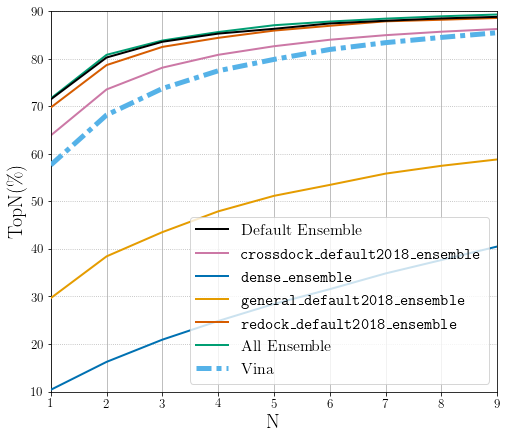

In [258]:
for big_df,data_type in [(plot_df_rd,'redocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'Default Ensemble' in col:
            zorder = 10
        else:
            zorder = i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        lw = get_linewidth(col)
        c = color_dict[col.replace(' Ensemble','')]
        name = makeClNames(col)
        p = plt.plot(rang, big_df[col], label=name,c=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0], ylim[1])
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [259]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')

# Thresholding Graphs
## CNNscore

In [260]:
thresh_fs = 17

### CNNscore -Ensemble Models

In [261]:
filename='thresh_cnnscore_ensembles.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]
print(figname)

thresh_cnnscore_ensembles


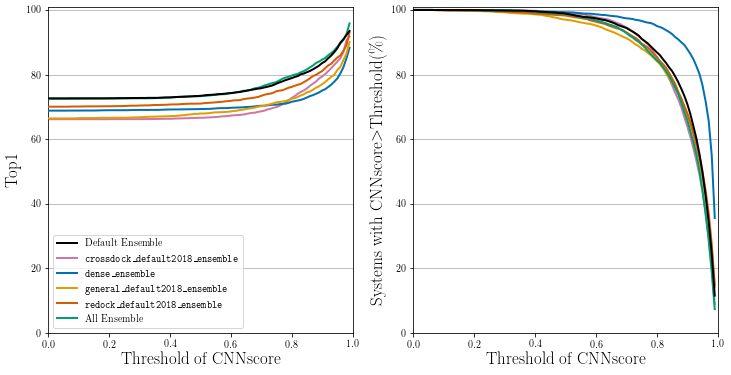

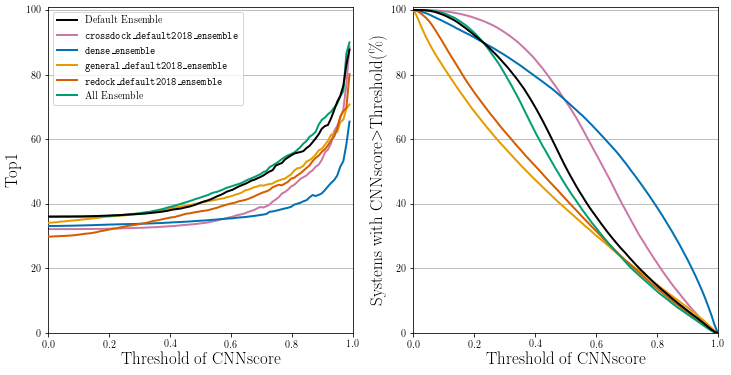

In [262]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=[12,6],sharex=True,sharey=True)
    rang= list(big_df.index)
    for i,c in enumerate([col for col in big_df.columns if 'Good' in col]):
        model = c.replace(' Good','')
        c = color_dict[model.replace(' Ensemble','')]
        ls = get_linestyle(model)
        lw = get_linewidth(model)
        if 'Default Ensemble' == model:
            zorder = 10
        else:
            zorder = i+1
        name = makeClNames(model)
        ax1.plot(rang,big_df[f'{model} Good'],label=name,color=c,linestyle=ls,linewidth=lw,zorder=zorder)
        ax2.plot(rang,big_df[f'{model} Left'],label=name,color=c,linestyle=ls,linewidth=lw,zorder=zorder)
    ax1.set_xlabel('Threshold of CNNscore',fontsize=thresh_fs)
    ax2.set_xlabel('Threshold of CNNscore',fontsize=thresh_fs)
    ax1.grid(b=True,axis='y',which='major')
    ax1.legend()
    ax2.yaxis.set_tick_params(labelbottom=True)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,101)
    ax1.set_ylabel('Top1',fontsize=thresh_fs)
    ax2.set_ylabel('Systems with CNNscore$>$Threshold(\%)',fontsize=thresh_fs)
    # box = ax1.get_position()
    # ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # lgd = plt.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1.15, 0.5))
    #plt.ylim(60,100)
    ax2.grid(b=True,axis='y',which='major')
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [263]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

# Benchmark Graphs

In [264]:
marker_dict={'Ensemble':'x',
            '':'o',
            'EnsembleRefine':'^'}
lgd_elements = [Patch(facecolor=value, edgecolor=value,
                         label=makeClNames(key))  for key,value in color_dict.items() if key not in ['Smina','All','Default']]
lgd_elements += [Patch(facecolor=color_dict['Default'], edgecolor=color_dict['Default'], label=makeClNames('Default Ensemble')),
                Patch(facecolor=color_dict['All'], edgecolor=color_dict['All'], label=makeClNames('All Ensemble'))]
lgd_elements += [Line2D([0], [0], marker='x', color='grey', label='Ensemble',
                          markerfacecolor='grey', markersize=15,linestyle='None'),
                 Line2D([0], [0], marker='o', color='grey', label='Single Model',
                          markerfacecolor='grey', markersize=15,linestyle='None')]
refine_elem = [Patch(facecolor=color_dict['Default'], edgecolor=color_dict['Default'], label='Default Ensemble'),
                Patch(facecolor=color_dict['Vina'], edgecolor=color_dict['Vina'], label='Vina'),
               Line2D([0], [0], marker='x', color='grey', label='Rescore',
                          markerfacecolor='grey', markersize=15,linestyle='None'),
                Line2D([0], [0], marker='^', color='grey', label='Refinement',
                          markerfacecolor='grey', markersize=15,linestyle='None')]

In [265]:
filename='rescore_single_models.csv'
plot_df_rd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='rescore_ensembles.csv'
plot_df_rd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='rescore_vs_refine.csv'
plot_df_rd_ref =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_ref =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='gpu_models.csv'
plot_df_b =pd.read_csv(f'/home/anm329/GNINA-1.0/data/benchmark/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)

gpu_models_line


In [266]:
for idx, row in plot_df_b.iterrows():
    if row['model'] in plot_df_rd_single.columns:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_single.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_single.iloc[0][row['model']]
    elif 'Refine' in row['model']:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_ref.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_ref.iloc[0][row['model']]
    else:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_ensemble.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_ensemble.iloc[0][row['model']]

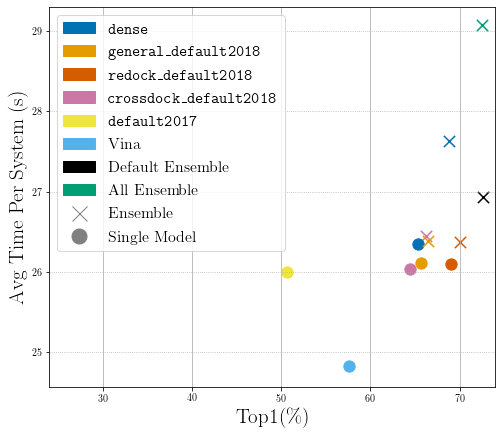

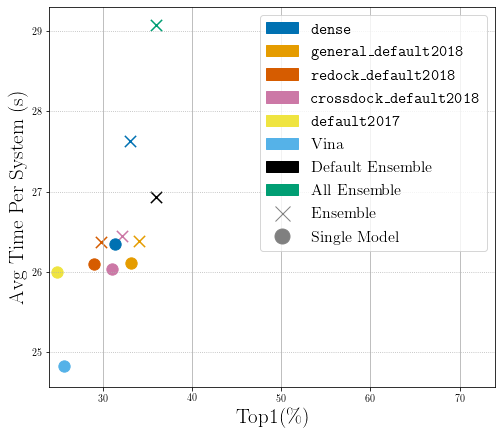

In [267]:
xlim = (np.floor(min(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())),
            np.ceil(max(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())))
for data_type in [('redocking','rd_perf'),('crossdocking','cd_perf')]:
    for cnn_types in ['rescore']:
        plot_elements = lgd_elements
        if cnn_types == 'compare':
            plot_elements = refine_elem
        ax = plt.figure(figsize=[8,7]).gca()
        for idx,row in plot_df_b.iterrows():
            model = row['model']
            basename = model.replace(' Ensemble','')
            if 'Refine' in model:
                if cnn_types == 'compare':
                    basename = model.replace(' Ensemble Refine', '')
                else:
                    continue
            markerstyle=marker_dict[model.replace(basename,"").replace(" ","")]
            c = color_dict[basename]
            plt.scatter(row[data_type[1]],row['mean'],c=c,marker=markerstyle,s=128)
        ax.set_xbound(xlim[0],xlim[1]+1)
        ax.set_xlabel(r'Top1(\%)',fontsize=fontsize+1)
        ax.set_ylabel('Avg Time Per System (s)',fontsize=fontsize+1)
        plt.grid(axis='x')
        plt.grid(axis='y',linestyle=':')
        lgd = ax.legend(fontsize=16,handles=plot_elements)
        plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type[0]}/{figname}_{cnn_types}.pdf', dpi=dpi)

In [268]:
def autolabel_horizontal(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{:.1f}'.format(width),
                    xy=( width, rect.get_y() + rect.get_height() / 2),
                    xytext=(18, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

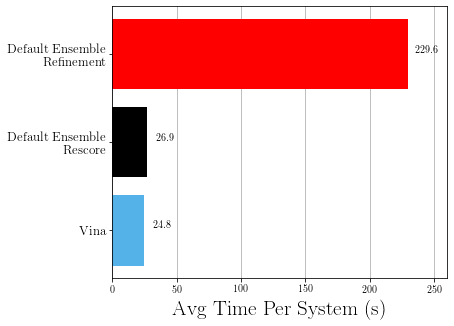

In [269]:
comparisons = ['Vina','Default Ensemble','Default Ensemble Refine']
hbarinfo = plot_df_b.set_index('model').loc[comparisons]
names = ['Vina','Default Ensemble\nRescore','Default Ensemble\nRefinement']
ypos = np.arange(len(comparisons))
ax = plt.figure(figsize=[6,5]).gca()
bars = ax.barh(ypos,hbarinfo['mean'],color=[color_dict['Vina'],'k','r'])
autolabel_horizontal(bars)
ax.set_yticks(ypos)
ax.set_yticklabels(names,fontsize=13)
plt.grid(axis='x',zorder=4)
ax.set_axisbelow(True)
ax.set_xlabel('Avg Time Per System (s)',fontsize=fontsize+1)
ax.set_xlim(0,260)
plt.savefig(f'/home/anm329/GNINA-1.0/figures/other/refine_timing_comparison.pdf',dpi=dpi,bbox_inches='tight')

### No GPU

In [270]:
lgd_elements = [Patch(facecolor=value, edgecolor=value,
                         label=makeClNames(key))  for key,value in color_dict.items() if key not in ['Smina','All','Default']]
lgd_elements += [Patch(facecolor=color_dict['Default'], edgecolor=color_dict['Default'], label='Default Ensemble'),
                Patch(facecolor=color_dict['All'], edgecolor=color_dict['All'], label='All Ensemble')]
lgd_elements += [Line2D([0], [0], marker='x', color='grey', label='Ensemble',
                          markerfacecolor='grey', markersize=15,linestyle='None'),
                 Line2D([0], [0], marker='o', color='grey', label='Single Model',
                          markerfacecolor='grey', markersize=15,linestyle='None')]

In [271]:
filename='rescore_single_models.csv'
plot_df_rd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_single =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='rescore_ensembles.csv'
plot_df_rd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd_ensemble =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
filename='nogpu_models.csv'
plot_df_b =pd.read_csv(f'/home/anm329/GNINA-1.0/data/benchmark/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)

nogpu_models_line


In [272]:
for idx, row in plot_df_b.iterrows():
    if row['model'] in plot_df_rd_single.columns:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_single.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_single.iloc[0][row['model']]
    else:
        plot_df_b.at[idx,'rd_perf'] = plot_df_rd_ensemble.iloc[0][row['model']]
        plot_df_b.at[idx,'cd_perf'] = plot_df_cd_ensemble.iloc[0][row['model']]

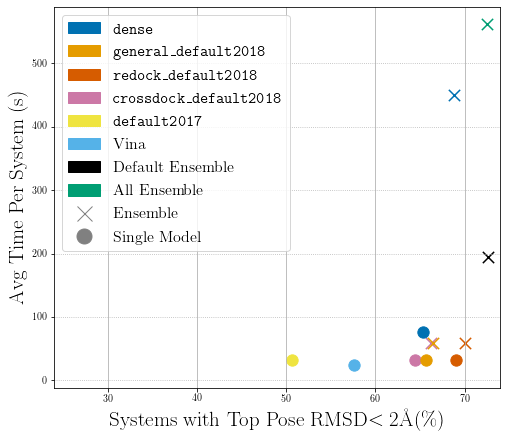

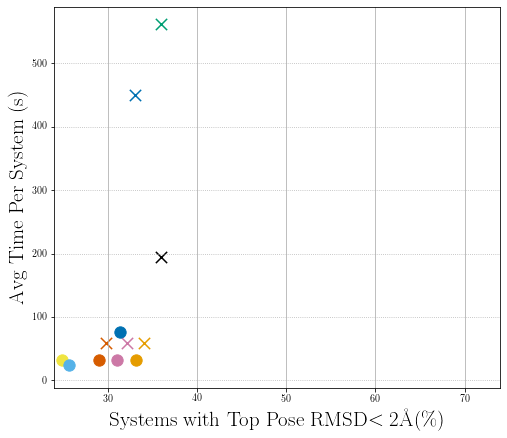

In [273]:
xlim = (np.floor(min(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())),
            np.ceil(max(plot_df_b['rd_perf'].values.tolist()+plot_df_b['cd_perf'].values.tolist())))
for data_type in [('redocking','rd_perf'),('crossdocking','cd_perf')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for idx,row in plot_df_b.iterrows():
        model = row['model']
        basename = model.replace(' Ensemble','')
        markerstyle=marker_dict[model.replace(basename,"").replace(" ","")]
        c = color_dict[basename]
        plt.scatter(row[data_type[1]],row['mean'],c=c,marker=markerstyle,s=128)
    ax.set_xbound(xlim[0],xlim[1]+1)
    ax.set_xlabel(r'Systems with Top Pose RMSD$<2$\AA(\%)',fontsize=fontsize+1)
    ax.set_ylabel('Avg Time Per System (s)',fontsize=fontsize+1)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    if data_type[0] == 'redocking':
        lgd = ax.legend(fontsize=16,handles=lgd_elements)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type[0]}/{figname}.pdf', dpi=dpi)

# For Sweep Figures

In [274]:
xlim=(1,9)
def get_linestyle(column_name):
    if 'DefE' in column_name:
        linestyle = '-'
    elif 'Vina' in column_name:
        linestyle = (0, (3, 1, 1, 1))
    return linestyle

## Exhaustiveness

In [275]:
filename='sweep_exhaustiveness.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='4'),
                   Patch(facecolor='k', edgecolor='k',
                         label='8 (Default)'),
                  Patch(facecolor='r', edgecolor='r',
                         label='16'),
                Line2D([0], [0], color='grey', label='Default Ensemble'),
                Line2D([0], [0], color='grey', label='Vina',linestyle=(0, (3, 1, 1, 1)))
               ]
color_dict = {'4':'b','8':'k',
              '16':'r'}

sweep_exhaustiveness_line


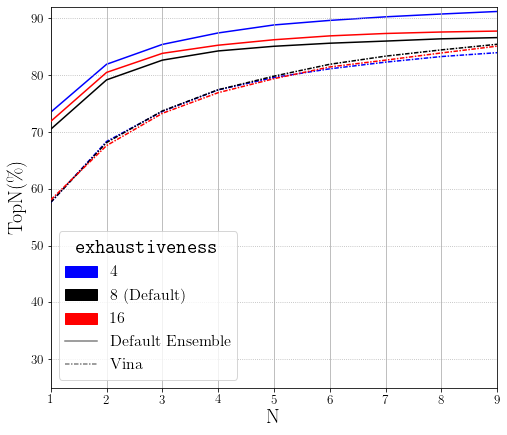

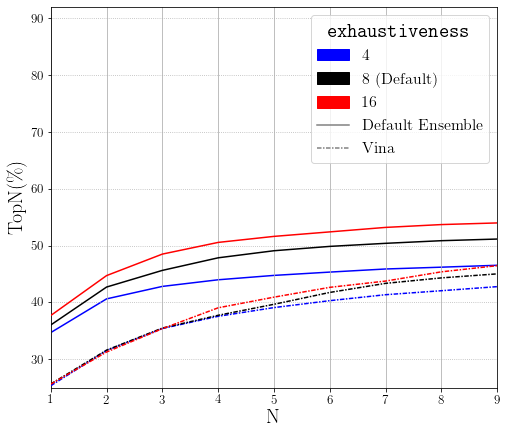

In [276]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]: 
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_8' in col:
            zorder = 10
        else:
            zorder = i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col.split('_')[1] not in ['4','8','16']:
            continue
        c = color_dict[col.split('_')[1]]
        p = plt.plot(rang, big_df[col],linestyle=ls, label=col,c=c,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{exhaustiveness}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [277]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Autobox Add

In [278]:
filename='sweep_autobox_add.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='2'),
                  Patch(facecolor='k', edgecolor='k',
                         label='4 (Default)'),
                  Patch(facecolor='r', edgecolor='r',
                         label='6'),
                  Patch(facecolor='g', edgecolor='g',
                         label='8')]
color_dict = {'2':'b','4':'k',
              '6':'r','8': 'g'}

sweep_autobox_add_line


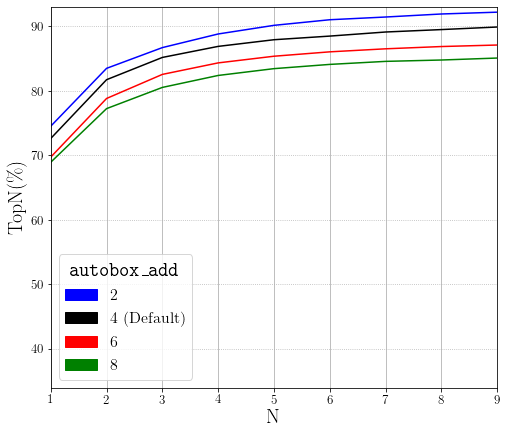

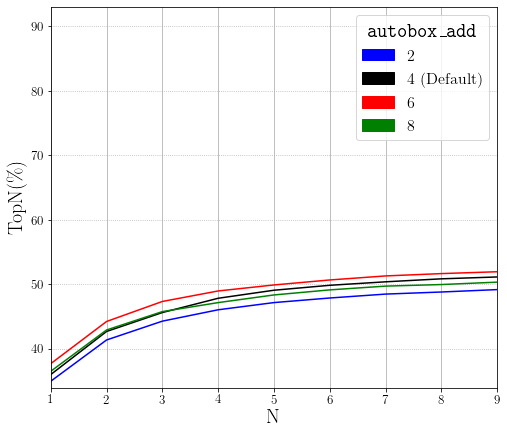

In [279]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{autobox\_add}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [280]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Number MC Saved

In [281]:
filename='sweep_mcsaved.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='20'),
                  Patch(facecolor='r', edgecolor='r',
                         label='40'),
                  Patch(facecolor='k', edgecolor='k',
                         label='50 (Default)'),
                  Patch(facecolor='g', edgecolor='g',
                         label='60'),
                  Patch(facecolor='m', edgecolor='m',
                         label='80'),
                  Patch(facecolor='orange', edgecolor='orange',
                         label='100')]
color_dict = {'20':'b','40':'r','60':'g','80': 'm','100':'orange','Default':'k'}

sweep_mcsaved_line


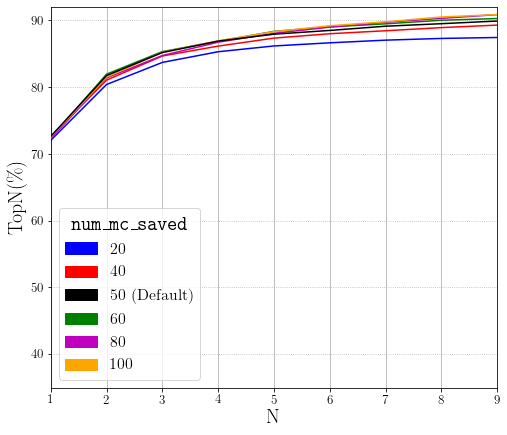

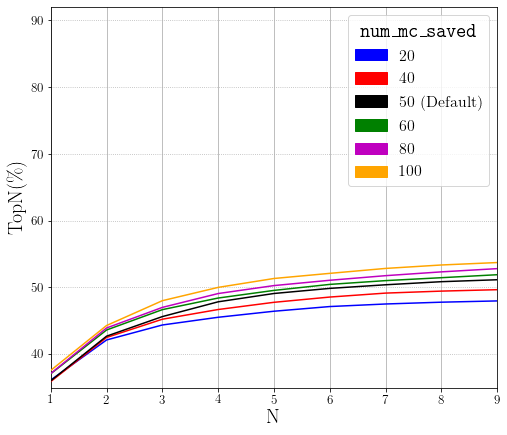

In [282]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_Default' == col:
            zorder = 7
        else:
            zorder = i + 1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{num\_mc\_saved}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [283]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## CNN Rotations

In [284]:
filename='sweep_cnnrot.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='k', edgecolor='k',
                         label='0 (Default)'),
                  Patch(facecolor='b', edgecolor='b',
                         label='1'),
                  Patch(facecolor='g', edgecolor='g',
                         label='5'),
                  Patch(facecolor='r', edgecolor='r',
                         label='10'),
                  Patch(facecolor='m', edgecolor='m',
                         label='20')]
color_dict = {'0':'k','1':'b',
              '5':'g','10': 'r','20':'m'}

sweep_cnnrot_line


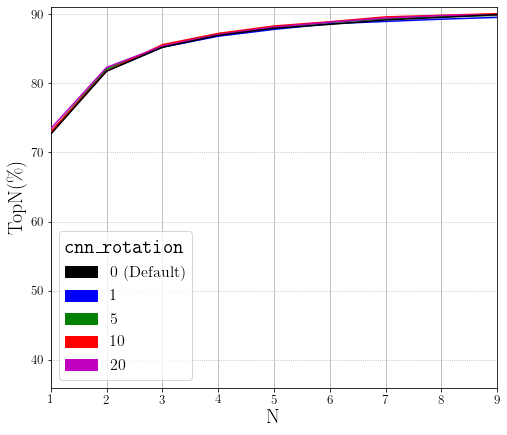

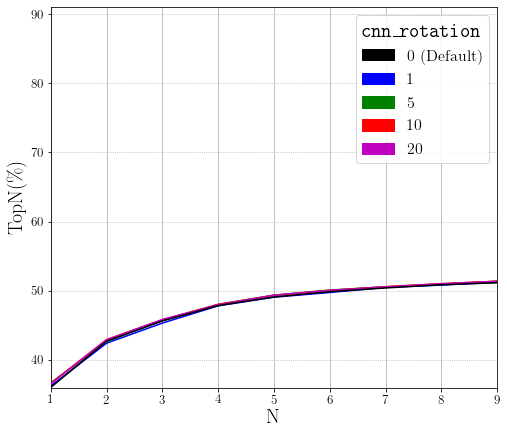

In [285]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_0' == col:
            zorder=7
        else:
            zorder=i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{cnn\_rotation}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [286]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Number of Modes

In [287]:
filename='sweep_num_modes.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='k', edgecolor='k',
                         label='9 (Default)'),
                  Patch(facecolor='b', edgecolor='b',
                         label='100')]
color_dict = {'9':'k','100':'b'}

sweep_num_modes_line


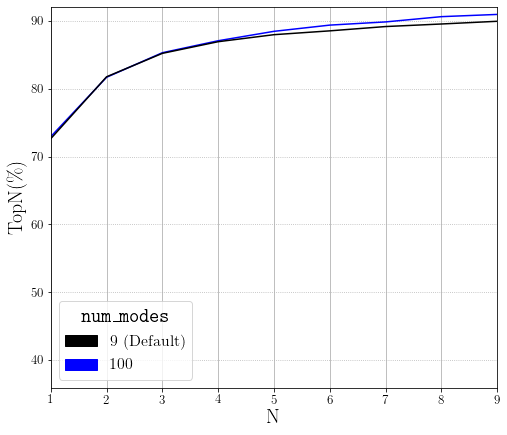

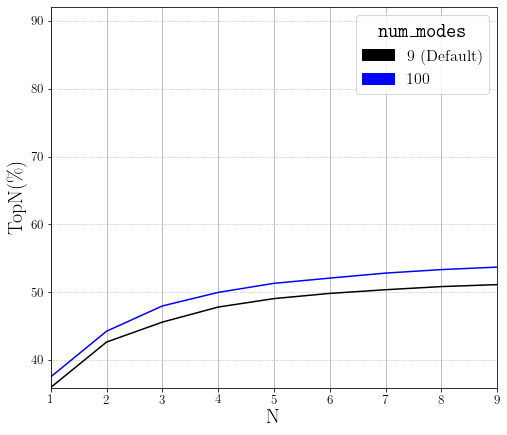

In [288]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_9' == col:
            zorder=3
        else:
            zorder=i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{num\_modes}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [289]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Minimum RMSD Filter

In [290]:
filename='sweep_rmsdf.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0.5'),
                  Patch(facecolor='k', edgecolor='k',
                         label='1.0 (Default)'),
                  Patch(facecolor='r', edgecolor='r',
                         label='1.5')]
color_dict = {'0.5':'b','1.0':'k','1.5':'r'}

sweep_rmsdf_line


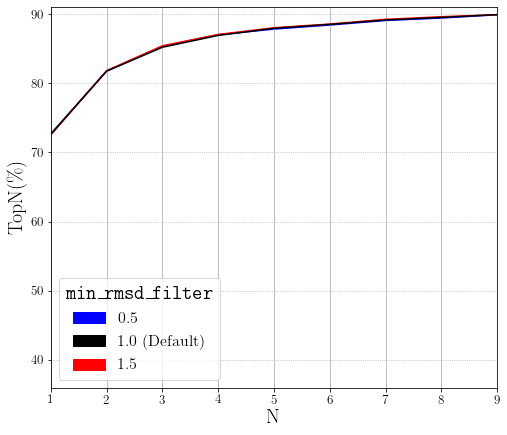

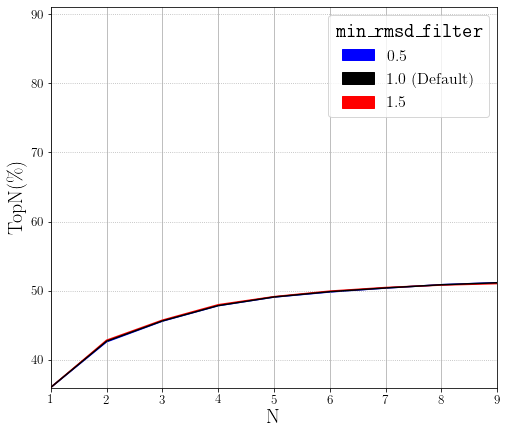

In [291]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_1.0' == col:
            zorder=4
        else:
            zorder=i+1
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5,zorder=zorder)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1]+1)
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{min\_rmsd\_filter}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [292]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Refinement with CNN Empirical Weight

In [293]:
filename='refine_sweep_cnn_empirical_weight.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])
lgd_elements = [Patch(facecolor='b', edgecolor='b',
                         label='0.01'),
                  Patch(facecolor='g', edgecolor='g',
                         label='0.1'),
                  Patch(facecolor='k', edgecolor='k',
                         label='1'),
                  Patch(facecolor='m', edgecolor='m',
                         label='10'),
                Patch(facecolor='r', edgecolor='r',
                         label='No Empirical Weight')]
#                   Patch(facecolor='#55b2e8', edgecolor='#55b2e8',
#                          label='Vina')]
color_dict = {'0.01':'b','0.1':'g','1':'k','10': 'm','Vina':'#55b2e8','No Empirical Weight':'r'}

refine_sweep_cnn_empirical_weight_line


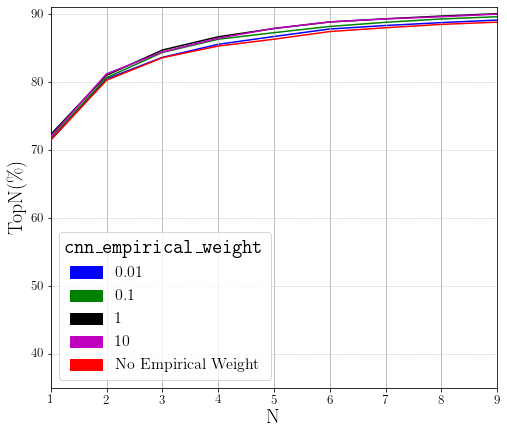

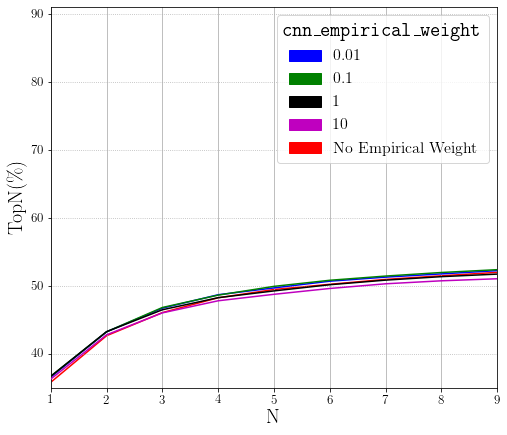

In [294]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for i,col in enumerate(big_df.columns):
        if 'DefE_1.0' == col:
            zorder=4
        else:
            zorder=i+1
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        if col != 'Vina':
            c = color_dict[col.split('_')[1]]
            p = plt.plot(rang, big_df[col], label=col,c=c,zorder=zorder)
        else:
            c = color_dict[col.replace(' Ensemble','')]
            p = plt.plot(rang, big_df[col], label=col,linestyle=ls,c=c,linewidth=5)
    #     if args.use_bound:  # this adds shading to show the systems with dockings that are very "good" and less "good" (1 and 3 RMSD)
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good1'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    #         plt.fill_between(rang, plot_df['good2'].astype('float64').values, plot_df['good3'].astype('float64').values, alpha = 0.1, color=p[-1].get_color())
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{cnn\_empirical\_weight}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [295]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

## Whole Protein

In [296]:
filename='whole_ptn_sweep_exhaustiveness.csv'
plot_df_rd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}',index_col=0)
plot_df_cd =pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}',index_col=0)
figname = filename.split('.')[0]+'_line'
print(figname)
ylim = get_ylim([plot_df_rd,plot_df_cd])

whole_ptn_sweep_exhaustiveness_line


In [297]:
lgd_elements = [Patch(facecolor='k', edgecolor='k',
                         label='8 (Default)'),
                  Patch(facecolor='b', edgecolor='b',
                         label='16'),
                  Patch(facecolor='r', edgecolor='r',
                         label='32'),
                  Patch(facecolor='g', edgecolor='g',
                         label='64'),
                Line2D([0], [0], color='grey', label='Default Ensemble'),
                Line2D([0], [0], color='grey', label='Vina',linestyle=(0, (3, 1, 1, 1)))
               ]
color_dict = {'8':'k','16':'b','32':'r','64': 'g'}

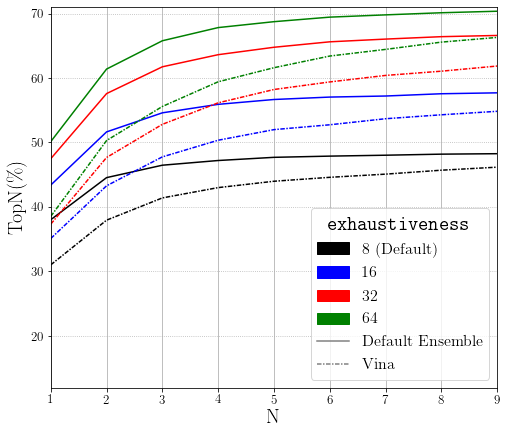

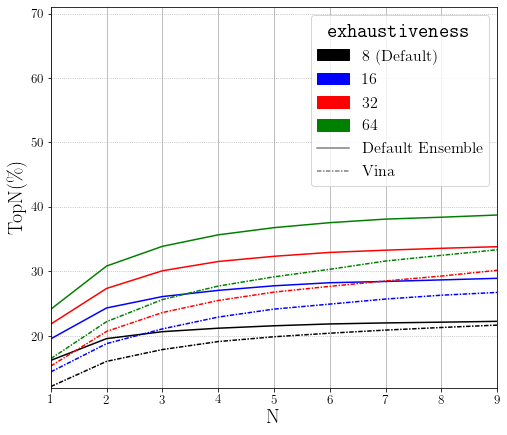

In [298]:
for big_df,data_type in [(plot_df_rd,'redocking'),(plot_df_cd,'crossdocking')]:
    ax = plt.figure(figsize=[8,7]).gca()
    for col in big_df.columns:
        #plot_df = list_of_dataframes[j]
        #rang = list_of_ranges[j]
        rang = list(range(1,big_df[col].fillna(0).astype(bool).sum()+1))
        ls = get_linestyle(col)
        c = color_dict[col.split('_')[1]]
        p = plt.plot(rang, big_df[col], label=col,c=c,linestyle=ls)
    ax.set_xlim(left=xlim[0],right=xlim[1])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ybound(ylim[0],ylim[1])
    ax.set_xlabel(xlab,fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)
    plt.grid(axis='x')
    plt.grid(axis='y',linestyle=':')
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    lgd = ax.legend(fontsize=16,handles=lgd_elements,title=r'\texttt{exhaustiveness}',title_fontsize=20)
    plt.savefig(f'/home/anm329/GNINA-1.0/figures/{data_type}/{figname}.pdf', dpi=dpi)

In [299]:
plot_df_rd.to_csv(f'/home/anm329/GNINA-1.0/data/redocking/{filename}')
plot_df_cd.to_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{filename}')

# Downsample Figures

In [300]:
import gzip
def make_dict(filename,is_sweep=False,has_cnnscore=False,tag_prefix=None):
    #filling a dictionary
    # will be a dic of pocket:key:'rmsd'->[rmsds]  iff is_sweep=False
    #                             'score'->[cnnscores]
    #     else --  dic of tag:pocket:key:'rmsd'->[rmsds]
    #                                    'score'->[cnnscores]
    datadic={} #dic of pocket:key:[rmsds]
        
    with gzip.open(filename,'rt') as infile:
        for i,line in enumerate(infile):
            if i==0:
                continue
            items=line.rstrip().split(',')
            
            if has_cnnscore:
                pocket=items[6]
                key=items[7]+':'+items[8]
            else:
                pocket=items[3]
                key=items[4]+':'+items[5]
            
            rmsd=float(items[2])
            
            if is_sweep:
                if tag_prefix:
                    check=items[0].split(tag_prefix)[-1]
                else:
                    check=items[0]
                
                if '_' in check:
                    checkval=check.split('_')[0]
                    if checkval=='' or checkval=='rescore':
                        tag='0'
                    else:
                        tag=checkval
                else:
                    tag=float(items[0])
                if tag not in datadic:
                    datadic[tag]=dict()
                
                if pocket in datadic[tag] and key in datadic[tag][pocket]:
                    datadic[tag][pocket][key].append(rmsd)
                elif pocket in datadic[tag] and key not in datadic[tag][pocket]:
                    datadic[tag][pocket][key]=[rmsd]
                else:
                    datadic[tag][pocket]={key:[rmsd]}
            else:
                #no need to stratify by tag
                if pocket in datadic and key in datadic[pocket]:
                    datadic[pocket][key].append(rmsd)
                elif pocket in datadic and key not in datadic[pocket]:
                    datadic[pocket][key]=[rmsd]
                else:
                    datadic[pocket]={key:[rmsd]}
    return datadic

In [301]:
#function -- it calculates the topN percent & will look at N poses or all poses for a given key whichever is smaller
def topN(n, dic, thresh, redkeys=None,perpocket=False):
    '''
    This function returns the topN percentage by taking the top N poses
    and calculating the frac that meet thresh.
    Assumes dic is pocket-> key-> list of values.
    
    If redkeys (list of keys passed in) it will only use those keys
    
    If perpocket -- stats are calculated per-pocket and averaged
                    instead of just using ALL data
    '''
    
    has_stuff=[]
    counter=0 #tracks total number of poses
    
    
    if perpocket:
        for key,data in dic.items():
            kstuff=[]
            kcount=0#tracks number of poses per key
            
            for key2, data2 in data.items():
                
                #if reducing, skip over not selected items
                if redkeys and key2 not in redkeys:
                    continue
                counter+=1
                kcount+=1
                if n < len(data2):
                    lookat=n
                else:
                    lookat=len(data2)
                
                for rmsd in data2[:lookat]:
                    if rmsd < thresh:
                        kstuff.append(True)
                        break
            has_stuff.append(np.sum(kstuff)/float(kcount))
        #end for
        #print(counter)
        return np.mean(has_stuff)
    else:
        for key,data in dic.items():
            for key2, data2 in data.items():

                #if reducing, skip over not selected items
                if redkeys and key2 not in redkeys:
                    continue

                counter+=1
                if n<len(data2):
                    lookat=n
                else:
                    lookat=len(data2)
                for rmsd in data2[:lookat]:
                    if rmsd < thresh:
                        has_stuff.append(True)
                        break
        #print(counter)
        return np.sum(has_stuff)/float(counter)

In [302]:
sdatadic=make_dict('data/sminadocked_rmsds.csv.gz')
gdatadic=make_dict('data/gninadocked_rmsds.csv.gz')

In [303]:
skey_dict={}
with (open('data/fixed_downsampling_keys_dic.pi', "rb")) as openfile:
    skey_dict = pickle.load(openfile)

In [304]:
pp_smina_ds_dic={}
pp_gnina_ds_dic={}
for nsamples,skeys in sorted(list(skey_dict.items())):
    sdata=[]
    gdata=[]
    for i in range(1,10):
        sdata.append(topN(i,sdatadic,2,redkeys=skeys,perpocket=True)*100)
        gdata.append(topN(i,gdatadic,2,redkeys=skeys,perpocket=True)*100)
    pp_smina_ds_dic[nsamples]=sdata
    pp_gnina_ds_dic[nsamples]=gdata

In [305]:
pp_smina_top=[]
pp_gnina_top=[]

for i in range(1,10):
    pp_smina_top.append(topN(i,sdatadic,2,perpocket=True)*100)
    pp_gnina_top.append(topN(i,gdatadic,2,perpocket=True)*100)

In [306]:
def get_ylim_special(all_data):
    ylim=[100,0]
    for data in all_data:
        if isinstance(data,dict):
            data = pd.DataFrame(data)
        elif isinstance(data,list):
            data = pd.DataFrame(data)
        minimum_data = data.min().min()
        maximum_data = data.max().max()
        if minimum_data < ylim[0]:
            ylim[0] = minimum_data
        if maximum_data > ylim[1]:
            ylim[1] = maximum_data
    ylim[0] = np.floor(ylim[0])
    ylim[1] = np.ceil(ylim[1])
    return ylim

### Smina

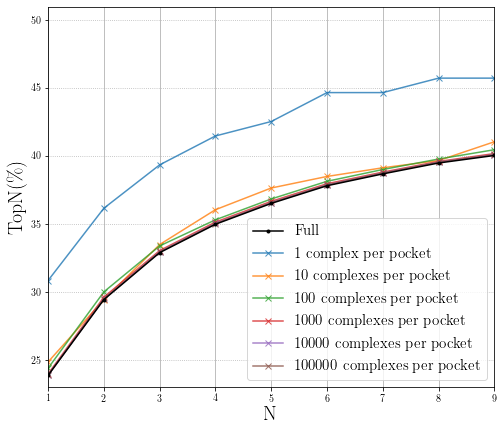

In [307]:
ylim = get_ylim_special([pp_smina_top,pp_smina_ds_dic,pp_gnina_top,pp_gnina_ds_dic])
ax = plt.figure(figsize=[8,7]).gca()
plt.plot([1,2,3,4,5,6,7,8,9],pp_smina_top,label='Full',marker='.',zorder=8,color='k')

for key in sorted(list(pp_smina_ds_dic.keys())):
    plural=''
    if key > 1:
        plural='es'
    plt.plot(range(1,10),pp_smina_ds_dic[key],label=f'{key:.0f} complex{plural} per pocket',marker='x',alpha=0.8)

ax.legend(fontsize=15)
ax.set_xlabel(xlab,fontsize=fontsize)
ax.set_ylim(ylim[0],ylim[1]+1)
ax.set_ylabel(ylab,fontsize=fontsize)
ax.set_xlim(xlim[0],xlim[1])
plt.grid(axis='y',linestyle=':')
plt.grid(axis='x')
#plt.title('Downsampling Smina -- Per Pocket Mean')
plt.savefig('figures/other/downsample_smina_perpocket.pdf', dpi=dpi)

### Gnina

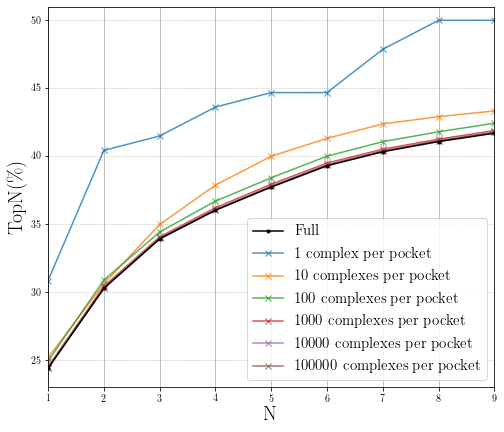

In [308]:
ax = plt.figure(figsize=[8,7]).gca()
plt.plot([1,2,3,4,5,6,7,8,9],pp_gnina_top,label='Full',marker='.',zorder=8,color='k')

for key in sorted(list(pp_gnina_ds_dic.keys())):
    plural=''
    if key > 1:
        plural='es'
    plt.plot(range(1,10),pp_gnina_ds_dic[key],label=f'{key:.0f} complex{plural} per pocket',marker='x',alpha=0.8)

ax.legend(fontsize=15)
ax.set_xlabel(xlab,fontsize=fontsize)
ax.set_ylim(ylim[0],ylim[1]+1)
ax.set_ylabel(ylab,fontsize=fontsize)
ax.set_xlim(xlim[0],xlim[1])
plt.grid(axis='y',linestyle=':')
plt.grid(axis='x')
#plt.title('Downsampling Gnina - Per Pocket Mean')
plt.savefig('figures/other/downsample_gnina_perpocket.pdf', dpi=dpi)

# HeatMaps for PerPocket Top1
### First Defined Binding Pocket

In [309]:
file_name = 'top1_per_pocket'
final_dataframe= pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{file_name}.csv',index_col=0)
final_dataframe.columns = [makeClNames(col) for col in final_dataframe.columns]

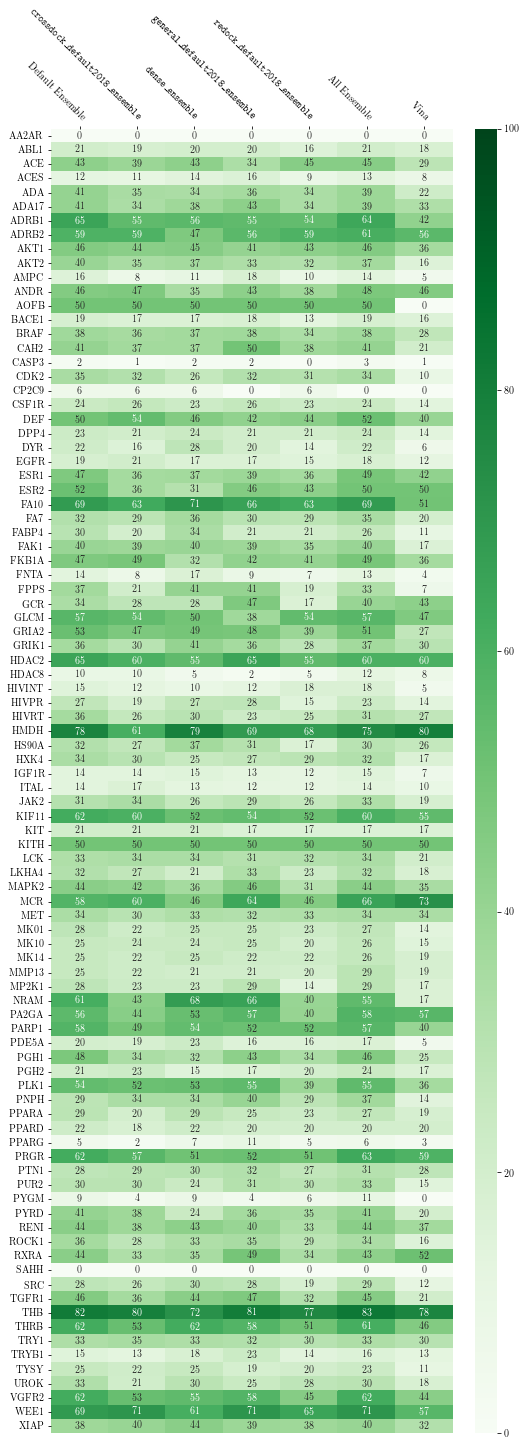

In [310]:
ax = plt.figure(figsize=[8,24]).gca()
ax = sns.heatmap(data=final_dataframe,cmap='Greens',vmin=0,vmax=100,annot=True,fmt='.0f',ax=ax,cbar_kws={'aspect':60,'fraction':0.05})
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.xticks(rotation=-45,ha="right",rotation_mode="anchor")
plt.savefig(f'/home/anm329/GNINA-1.0/figures/crossdocking/{file_name}.pdf',dpi=dpi,bbox_inches='tight')

### Whole Protein (DefE and Vina)

In [311]:
file_name = 'whole_ptn_top1_per_pocket'
final_dataframe= pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{file_name}.csv',index_col=0)

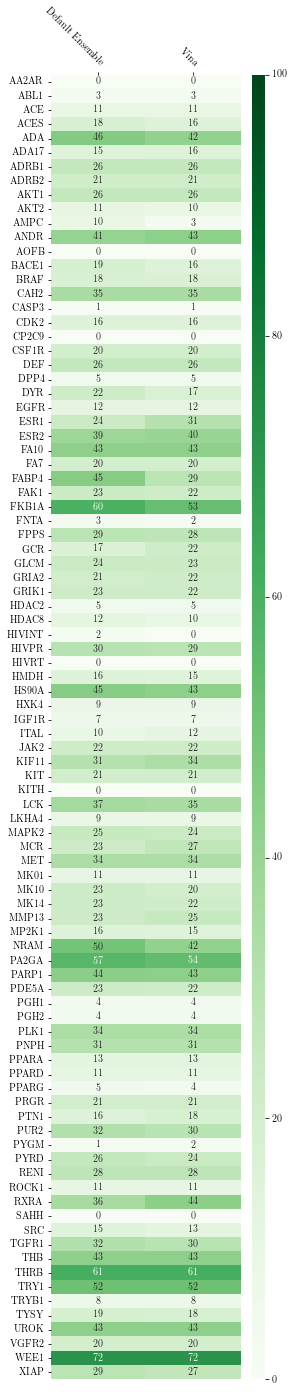

In [312]:
ax = plt.figure(figsize=[4,24]).gca()
sns.heatmap(data=final_dataframe,cmap='Greens',vmin=0,vmax=100,annot=True,fmt='.0f',ax=ax,cbar_kws={'aspect':100,'fraction':0.1})
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.xticks(rotation=-45,ha="right",rotation_mode="anchor")
plt.savefig(f'/home/anm329/GNINA-1.0/figures/crossdocking/{file_name}.pdf',dpi=dpi,bbox_inches='tight')

## Threshold [0,0.5,0.8]

In [313]:
file_name = 'thresh_top1_per_pocket'
final_dataframe= pd.read_csv(f'/home/anm329/GNINA-1.0/data/crossdocking/{file_name}.csv',index_col=0,na_values='--')

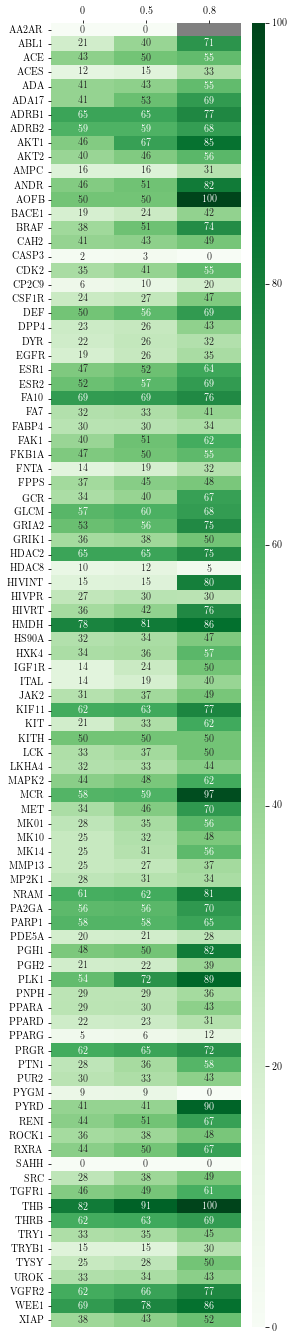

In [314]:
ax = plt.figure(figsize=[4,24]).gca()
colormap = plt.get_cmap('Greens')
colormap.set_bad("grey") 
sns.heatmap(data=final_dataframe,cmap=colormap,vmin=0,vmax=100,annot=True,fmt='.0f',ax=ax,cbar_kws={'aspect':100,'fraction':0.1})
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.savefig(f'/home/anm329/GNINA-1.0/figures/crossdocking/{file_name}.pdf',dpi=dpi,bbox_inches='tight')

## Bar Graph
Not Being used yet

In [315]:
# xlab = 'Pose Number'
# ylab = 'Percent Systems with RMSD<2(Cumulative)'
# figname=args.figname+'_bar'
# print(figname)
# args.annotate_size = 6
# print(args.annotate_size)

In [316]:
# ax = plt.figure(figsize=[8,7]).gca()
# offset = makeOffset(len(big_df.columns), args.width)
# for i,col in enumerate(big_df.columns):
#     #plot_df = list_of_dataframes[j]
#     bar_info = [big_df[col].iat[p] for p in args.use_pose]
# #     yerr = np.zeros(shape=(2, len(args.use_pose)), dtype=float)
#     c = color_dict[col.split(' ')[0]]
# #     if args.use_bound:  # for showing error bars on the bars to denote the systems below 1 and 3 rmsd for - and + error respectively
# #         for p_idx, pose in enumerate(args.use_pose):
# #             yerr_pos = float(plot_df.iloc[pose-1]['good3'])-float(plot_df.iloc[pose-1]['good2']) 
# #             yerr_neg = float(plot_df.iloc[pose-1]['good2'])-float(plot_df.iloc[pose-1]['good1']) 
# #             yerr[p_idx,:] = [yerr_neg, yerr_pos]
# #     else:
# #         yerr = None
#     rects = ax.bar(np.array(args.use_pose)+offset[i], bar_info, args.width/len(big_df.columns), align='center', label=col, capsize=4,color=c)
#     if args.annotate_size:  # adding annotations to the bars to tell their exact values
#         autolabel(rects, args.annotate_size, ax)
# #prettifyGraph(ax, 'Pose #', 'Percent Good Poses (<2 RMSD)', args.figname+'_bar', bargraph=args.use_pose, ylim=args.y_lim)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_autoscalex_on(True)
# ax.set_xticks(args.use_pose)
# ax.set_autoscaley_on(True)
# ax.tick_params(axis='both', which='major', labelsize=13)
# ax.set_xlabel(xlab,fontsize='large')
# ax.set_ylabel(ylab,fontsize='large')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(f'/home/anm329/GNINA-1.0/figures/{figname}.pdf', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')